In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

from keras import layers, models
from keras.models import Sequential
from keras.layers import Dense, PReLU, Input, Dropout, Activation, Flatten, BatchNormalization
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.regularizers import l2
from keras.datasets import fashion_mnist

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback

import os

%matplotlib inline

In [2]:
print("TensorFlow", tf.__version__)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  details = tf.config.experimental.get_device_details(gpus[0])
  print("GPU details: ", details)

TensorFlow 2.20.0


In [3]:
#Завантажуємо дані
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
#попередня обробка
X_train = X_train.reshape(X_train.shape[0], 28 * 28) / 255
X_test = X_test.reshape(X_test.shape[0], 28 * 28) / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Створюємо першу модель 

In [6]:
FashionMNIST_v1 = Sequential(name='v1')

FashionMNIST_v1.add(Input(shape=(784,), name='v1_input'))
FashionMNIST_v1.add(Dense(64, activation='relu', name='v1_hidden1'))
FashionMNIST_v1.add(Dense(10, activation='sigmoid', name='v1_output'))

# Компіляція моделі
FashionMNIST_v1.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

FashionMNIST_v1.summary()

Model: "v1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ v1_hidden1 (Dense)                   │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v1_output (Dense)                    │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
%%time
history_FashionMNIST_v1=FashionMNIST_v1.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=30,
    validation_split=0.2,
     verbose=1,
)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6857 - loss: 0.9938 - val_accuracy: 0.7699 - val_loss: 0.6898
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7885 - loss: 0.6356 - val_accuracy: 0.8018 - val_loss: 0.5855
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8130 - loss: 0.5618 - val_accuracy: 0.8176 - val_loss: 0.5399
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8234 - loss: 0.5240 - val_accuracy: 0.8239 - val_loss: 0.5140
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8296 - loss: 0.5001 - val_accuracy: 0.8282 - val_loss: 0.4929
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8353 - loss: 0.4825 - val_accuracy: 0.8320 - val_loss: 0.4779
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8391 - loss: 0.4689 - val_accuracy: 0.8367 - val_loss: 0.4677
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8441 - loss: 0.4573 - val_accuracy: 0.

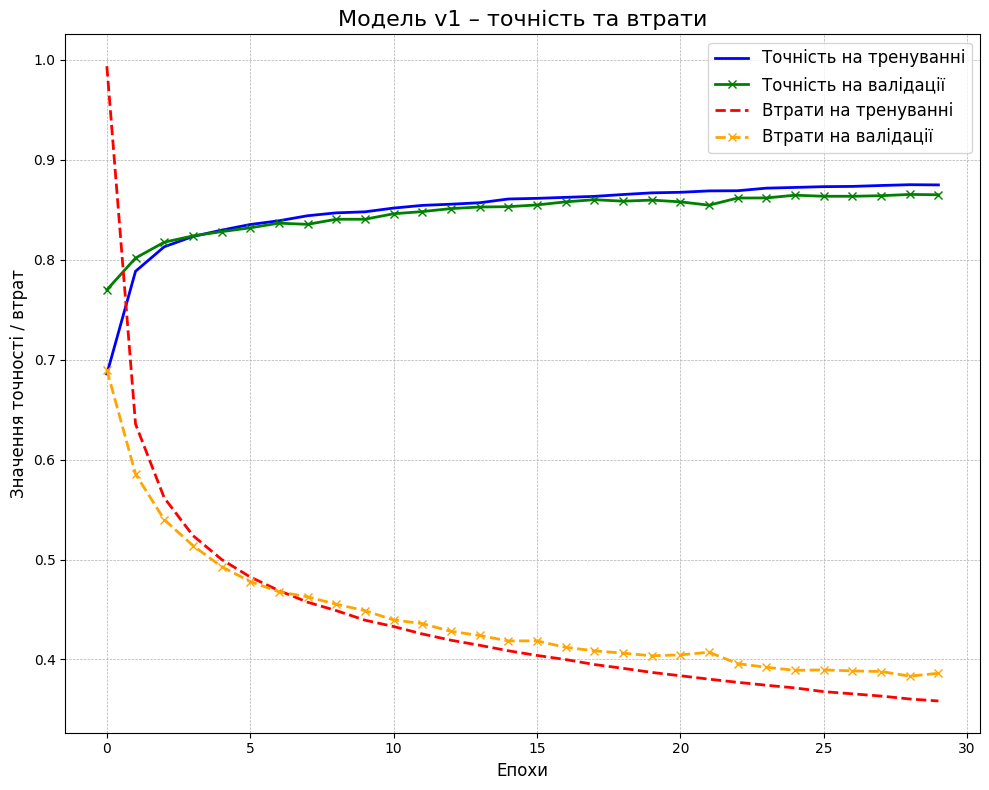

In [8]:
def plot_model(history=None, model_version='v1'):
    plt.figure(figsize=(10, 8))
    plt.plot(history.history['accuracy'], label='Точність на тренуванні', color='blue', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Точність на валідації', color='green', marker='x', linewidth=2)
    plt.plot(history.history['loss'], label='Втрати на тренуванні', color='red', linestyle='--', linewidth=2)
    plt.plot(history.history['val_loss'], label='Втрати на валідації', color='orange', linestyle='--', marker='x', linewidth=2)
    plt.title(f'Модель {model_version} – точність та втрати', fontsize=16)
    plt.xlabel('Епохи', fontsize=12)
    plt.ylabel('Значення точності / втрат', fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()
plot_model(history=history_FashionMNIST_v1, model_version='v1')

In [9]:
loss_FashionMNIST_v1, accuracy_FashionMNIST_v1 = FashionMNIST_v1.evaluate(X_test, y_test)
print('  Model    Loss   Accuracy   ')
print(f'    v1   {loss_FashionMNIST_v1:.4f}     {accuracy_FashionMNIST_v1:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8548 - loss: 0.4079
  Model    Loss   Accuracy   
    v1   0.4079     0.8548


Висновки: Згідно з вимогами точність найнаївнішої, але адекватної нейромережі становить приблизно 91%. Дана модель не відповідає вимозі.
    Потрібно доопрацювання та поексперементувати з гіперпараметрами.


# Створюємо другу модель, змінюємо кількість нейронів у шарі на 128 та додаємо новий шар 

In [10]:
FashionMNIST_v2 = Sequential(name='v2')
FashionMNIST_v2.add(Input(shape=(784,), name='v2_input'))
FashionMNIST_v2.add(Dense(128, activation='relu', name='v2_hidden1'))
FashionMNIST_v2.add(Dropout(0.3, name='v2_hidden2')) 
FashionMNIST_v2.add(Dense(10, activation='sigmoid', name='v2_output'))

# Компіляція моделі
FashionMNIST_v2.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

FashionMNIST_v2.summary()

Model: "v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ v2_hidden1 (Dense)                   │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v2_hidden2 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v2_output (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
%%time
history_FashionMNIST_v2=FashionMNIST_v2.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=30,
    validation_split=0.2,
     verbose=1,
)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6403 - loss: 1.0840 - val_accuracy: 0.7681 - val_loss: 0.7087
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7588 - loss: 0.7161 - val_accuracy: 0.8009 - val_loss: 0.6004
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7898 - loss: 0.6280 - val_accuracy: 0.8163 - val_loss: 0.5481
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8080 - loss: 0.5787 - val_accuracy: 0.8250 - val_loss: 0.5186
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8152 - loss: 0.5488 - val_accuracy: 0.8329 - val_loss: 0.4952
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8222 - loss: 0.5239 - val_accuracy: 0.8347 - val_loss: 0.4795
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8284 - loss: 0.5045 - val_accuracy: 0.8373 - val_loss: 0.4684
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8310 - loss: 0.4932 - val_accuracy: 0.

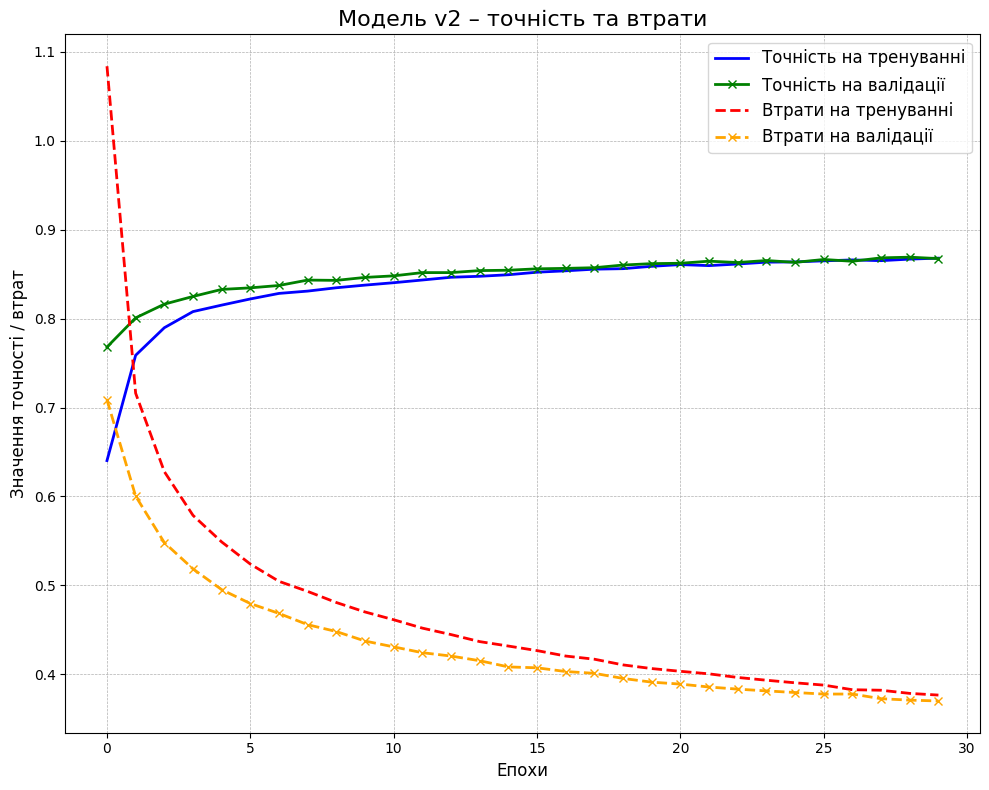

In [12]:
plot_model(history=history_FashionMNIST_v2, model_version='v2')

In [13]:
loss_FashionMNIST_v2, accuracy_FashionMNIST_v2 = FashionMNIST_v2.evaluate(X_test, y_test)
print('  Model    Loss   Accuracy   ')
print(f'    v1   {loss_FashionMNIST_v1:.4f}     {accuracy_FashionMNIST_v1:.4f}')
print(f'    v2   {loss_FashionMNIST_v2:.4f}     {accuracy_FashionMNIST_v2:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8585 - loss: 0.3945
  Model    Loss   Accuracy   
    v1   0.4079     0.8548
    v2   0.3945     0.8585


Висновки: Досягнута більша точність, але все одно не відповідає вимозі. Потрібно доопрацювання та  ще поексперементувати з гіперпараметрами.

# Створюємо третю модель, змінюємо активацію на 'softmax' та оптимізатор на 'Adam'

In [14]:
FashionMNIST_v3 = Sequential(name='v3')
FashionMNIST_v3.add(Input(shape=(784,), name='v3_input'))
FashionMNIST_v3.add(Dense(128, activation='relu', name='v3_hidden1'))
FashionMNIST_v3.add(Dropout(0.3, name='v3_hidden2')) 
FashionMNIST_v3.add(Dense(10, activation='softmax', name='v3_output'))

# Компіляція моделі
FashionMNIST_v3.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

FashionMNIST_v3.summary()

Model: "v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ v3_hidden1 (Dense)                   │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v3_hidden2 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v3_output (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
%%time
history_FashionMNIST_v3=FashionMNIST_v3.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=30,
    validation_split=0.2,
     verbose=1,
)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7895 - loss: 0.6010 - val_accuracy: 0.8470 - val_loss: 0.4283
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8429 - loss: 0.4382 - val_accuracy: 0.8545 - val_loss: 0.3996
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8577 - loss: 0.3965 - val_accuracy: 0.8652 - val_loss: 0.3726
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8642 - loss: 0.3751 - val_accuracy: 0.8731 - val_loss: 0.3553
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8693 - loss: 0.3589 - val_accuracy: 0.8738 - val_loss: 0.3510
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8737 - loss: 0.3450 - val_accuracy: 0.8740 - val_loss: 0.3434
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8756 - loss: 0.3388 - val_accuracy: 0.8737 - val_loss: 0.3489
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8797 - loss: 0.3264 - val_accuracy: 0.

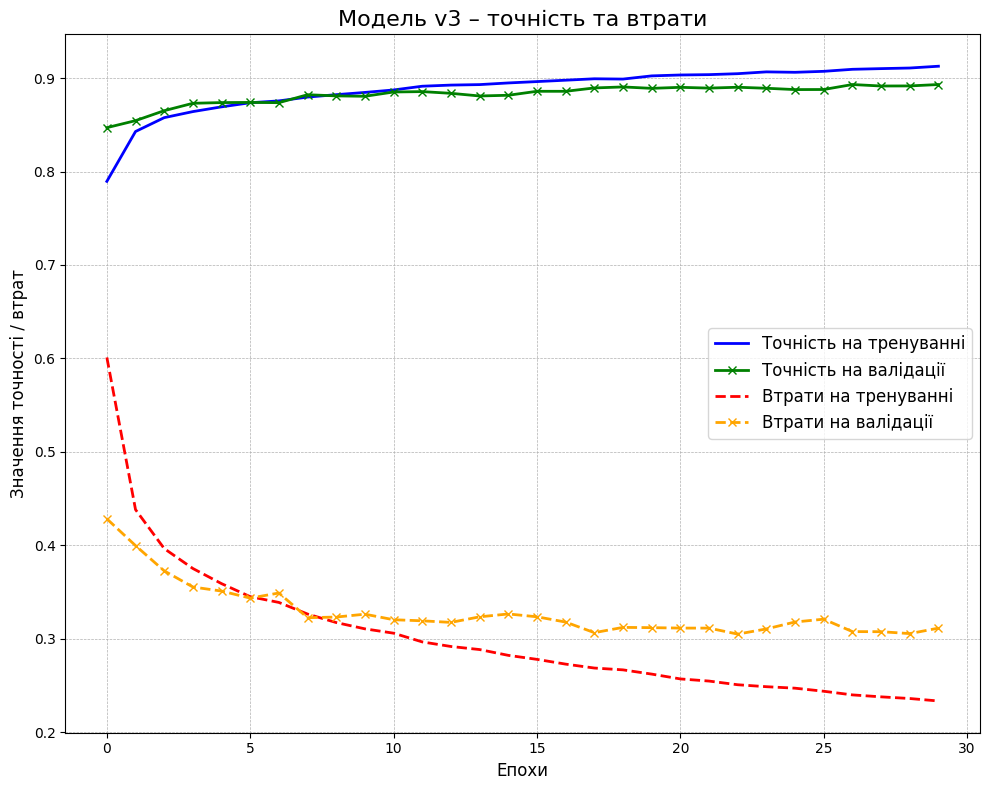

In [16]:
plot_model(history=history_FashionMNIST_v3, model_version='v3')

In [17]:
loss_FashionMNIST_v3, accuracy_FashionMNIST_v3 = FashionMNIST_v3.evaluate(X_test, y_test)
print('  Model    Loss   Accuracy   ')
print(f'    v1   {loss_FashionMNIST_v1:.4f}     {accuracy_FashionMNIST_v1:.4f}')
print(f'    v2   {loss_FashionMNIST_v2:.4f}     {accuracy_FashionMNIST_v2:.4f}')
print(f'    v3   {loss_FashionMNIST_v3:.4f}     {accuracy_FashionMNIST_v3:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8879 - loss: 0.3451
  Model    Loss   Accuracy   
    v1   0.4079     0.8548
    v2   0.3945     0.8585
    v3   0.3451     0.8879


Висновки: Досягнута значно більша точність, але все одно не відповідає вимозі. Потрібно  ще поексперементувати з гіперпараметрами.

# Створюємо четверту модель, змінюємо кількість нейронів у шарі на 256 та додаємо новий шар 

In [18]:
FashionMNIST_v4 = Sequential(name='v4')
FashionMNIST_v4.add(Input(shape=(784,), name='v4_input'))
FashionMNIST_v4.add(Dense(256, activation='relu', name='v4_hidden1'))
FashionMNIST_v4.add(Dropout(0.3, name='v4_hidden2')) 
FashionMNIST_v4.add(Dense(128, activation='relu', name='v4_hidden3'))
FashionMNIST_v4.add(Dense(10, activation='softmax', name='v4_output'))

# Компіляція моделі
FashionMNIST_v4.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

FashionMNIST_v4.summary()

Model: "v4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ v4_hidden1 (Dense)                   │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v4_hidden2 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v4_hidden3 (Dense)                   │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v4_output (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
%%time
history_FashionMNIST_v4=FashionMNIST_v4.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=30,
    validation_split=0.2,
     verbose=1,
)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7972 - loss: 0.5620 - val_accuracy: 0.8496 - val_loss: 0.4105
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8468 - loss: 0.4216 - val_accuracy: 0.8608 - val_loss: 0.3840
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8618 - loss: 0.3809 - val_accuracy: 0.8699 - val_loss: 0.3563
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8672 - loss: 0.3596 - val_accuracy: 0.8738 - val_loss: 0.3523
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8739 - loss: 0.3424 - val_accuracy: 0.8713 - val_loss: 0.3444
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8776 - loss: 0.3320 - val_accuracy: 0.8823 - val_loss: 0.3233
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8825 - loss: 0.3157 - val_accuracy: 0.8806 - val_loss: 0.3227
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8856 - loss: 0.3072 - val_accuracy: 0.

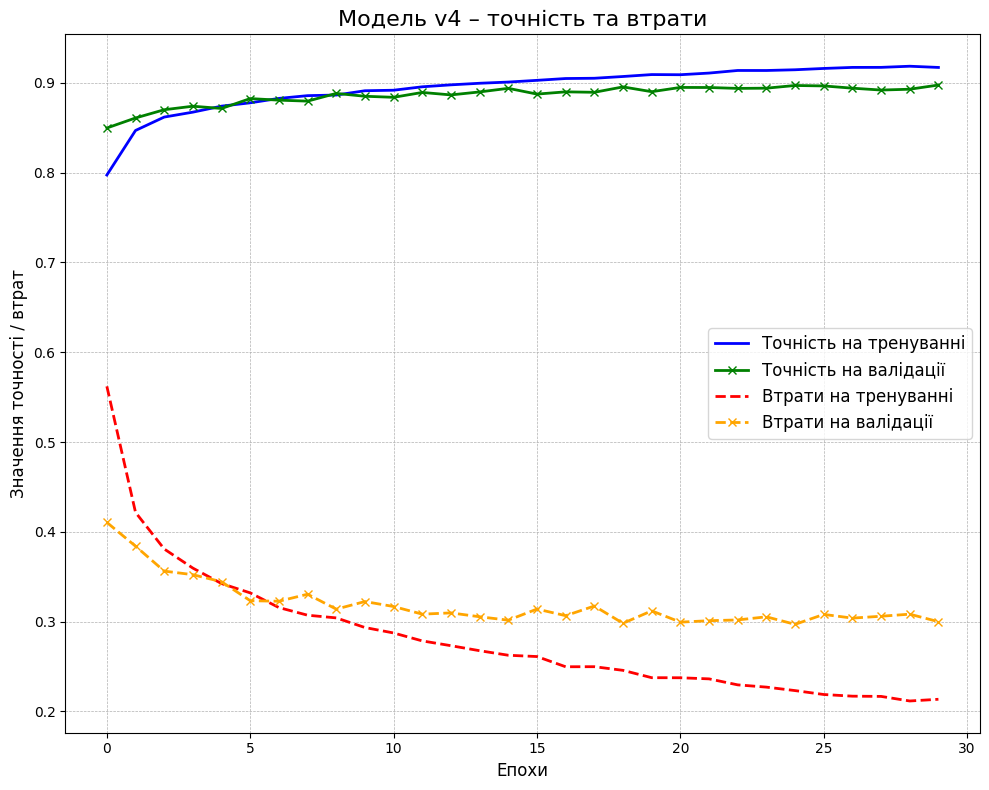

In [20]:
plot_model(history=history_FashionMNIST_v4, model_version='v4')

In [21]:
loss_FashionMNIST_v4, accuracy_FashionMNIST_v4 = FashionMNIST_v4.evaluate(X_test, y_test)
print('  Model    Loss   Accuracy   ')
print(f'    v1   {loss_FashionMNIST_v1:.4f}     {accuracy_FashionMNIST_v1:.4f}')
print(f'    v2   {loss_FashionMNIST_v2:.4f}     {accuracy_FashionMNIST_v2:.4f}')
print(f'    v3   {loss_FashionMNIST_v3:.4f}     {accuracy_FashionMNIST_v3:.4f}')
print(f'    v4   {loss_FashionMNIST_v4:.4f}     {accuracy_FashionMNIST_v4:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8897 - loss: 0.3239
  Model    Loss   Accuracy   
    v1   0.4079     0.8548
    v2   0.3945     0.8585
    v3   0.3451     0.8879
    v4   0.3239     0.8897


Висновки: Ще можна поексперементувати з гіперпараметрами.

# Створюємо пяту модель, змінюємо ReLU на PReLU

In [22]:
FashionMNIST_v5 = Sequential(name='v5')
FashionMNIST_v5.add(Input(shape=(784,), name='v5_input'))

FashionMNIST_v5.add(Dense(256, name='v5_hidden1'))
FashionMNIST_v5.add(PReLU(name='v5_prelu1'))
FashionMNIST_v5.add(Dropout(0.3, name='v5_dropout1'))

FashionMNIST_v5.add(Dense(128, name='v5_hidden2'))
FashionMNIST_v5.add(PReLU(name='v5_prelu2'))

FashionMNIST_v5.add(Dense(10, activation='softmax', name='v5_output'))

# Компіляція
FashionMNIST_v5.compile(
    optimizer='Adam',  
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

FashionMNIST_v5.summary()

Model: "v5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ v5_hidden1 (Dense)                   │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v5_prelu1 (PReLU)                    │ (None, 256)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v5_dropout1 (Dropout)                │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v5_hidden2 (Dense)                   │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v5_prelu2 (PReLU)                    │ (None, 128)                 │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v5_output (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,530 (920.04 KB)

 Trainable params: 235,530 (920.04 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
%%time
history_FashionMNIST_v5=FashionMNIST_v5.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=30,
    validation_split=0.2,
     verbose=1,
)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8026 - loss: 0.5484 - val_accuracy: 0.8411 - val_loss: 0.4409
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8500 - loss: 0.4106 - val_accuracy: 0.8585 - val_loss: 0.3890
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8621 - loss: 0.3736 - val_accuracy: 0.8697 - val_loss: 0.3639
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8701 - loss: 0.3539 - val_accuracy: 0.8610 - val_loss: 0.3623
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8754 - loss: 0.3412 - val_accuracy: 0.8727 - val_loss: 0.3470
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8777 - loss: 0.3267 - val_accuracy: 0.8790 - val_loss: 0.3278
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8818 - loss: 0.3152 - val_accuracy: 0.8842 - val_loss: 0.3220
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8858 - loss: 0.3038 - val_accuracy: 0.

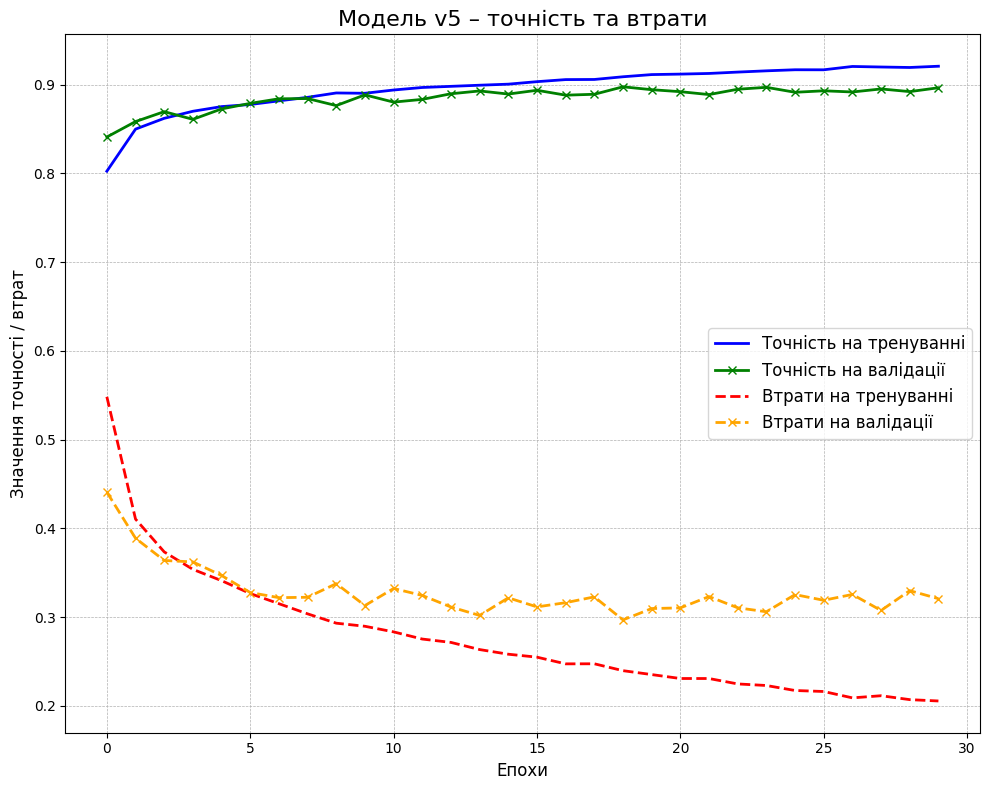

In [24]:
plot_model(history=history_FashionMNIST_v5, model_version='v5')

In [25]:
loss_FashionMNIST_v5, accuracy_FashionMNIST_v5 = FashionMNIST_v5.evaluate(X_test, y_test)
print('  Model    Loss   Accuracy   ')
print(f'    v1   {loss_FashionMNIST_v1:.4f}     {accuracy_FashionMNIST_v1:.4f}')
print(f'    v2   {loss_FashionMNIST_v2:.4f}     {accuracy_FashionMNIST_v2:.4f}')
print(f'    v3   {loss_FashionMNIST_v3:.4f}     {accuracy_FashionMNIST_v3:.4f}')
print(f'    v4   {loss_FashionMNIST_v4:.4f}     {accuracy_FashionMNIST_v4:.4f}')
print(f'    v5   {loss_FashionMNIST_v5:.4f}     {accuracy_FashionMNIST_v5:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8916 - loss: 0.3520
  Model    Loss   Accuracy   
    v1   0.4079     0.8548
    v2   0.3945     0.8585
    v3   0.3451     0.8879
    v4   0.3239     0.8897
    v5   0.3520     0.8916


# Cтворюємо шосту модель (додаємо регуляризацію, а також early_stopping, lr_scheduler)

In [26]:
FashionMNIST_v6 = Sequential(name='v6')
FashionMNIST_v6.add(Input(shape=(784,), name='v6_input'))

FashionMNIST_v6.add(Dense(256, 
    kernel_regularizer=regularizers.l2(0.001),  # L2-регуляризація
    name='v6_hidden1'
))
FashionMNIST_v6.add(PReLU(name='v6_prelu1'))
FashionMNIST_v6.add(Dropout(0.3, name='v6_dropout1'))

FashionMNIST_v6.add(Dense(128, 
    kernel_regularizer=regularizers.l2(0.001),  # L2-регуляризація
    name='v6_hidden2'
))
FashionMNIST_v6.add(PReLU(name='v6_prelu2'))

FashionMNIST_v6.add(Dense(10, activation='softmax', name='v6_output'))

# --- Callbacks ---
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# LR scheduler: LR змінюється після 10 епох
def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1 * (epoch - 9)))

lr_scheduler = LearningRateScheduler(scheduler, verbose=1)

# Callback для збереження LR для графіка
class LrHistory(Callback):
    def on_train_begin(self, logs=None):
        self.lrs = []

    def on_epoch_end(self, epoch, logs=None):
        self.lrs.append(float(self.model.optimizer.learning_rate))

lr_history = LrHistory()

# --- Компіляція ---
FashionMNIST_v6.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

FashionMNIST_v6.summary()

Model: "v6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ v6_hidden1 (Dense)                   │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v6_prelu1 (PReLU)                    │ (None, 256)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v6_dropout1 (Dropout)                │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v6_hidden2 (Dense)                   │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v6_prelu2 (PReLU)                    │ (None, 128)                 │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v6_output (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,530 (920.04 KB)

 Trainable params: 235,530 (920.04 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history_FashionMNIST_v6 = FashionMNIST_v6.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=50,  # Increased epochs to allow early stopping to work
    validation_split=0.2,
    callbacks=[early_stopping, lr_scheduler]
)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7935 - loss: 0.8951 - val_accuracy: 0.8434 - val_loss: 0.6559 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8379 - loss: 0.6327 - val_accuracy: 0.8344 - val_loss: 0.6212 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8426 - loss: 0.5716 - val_accuracy: 0.8464 - val_loss: 0.5526 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8487 - loss: 0.5391 - val_accuracy: 0.8592 - val_loss: 0.5076 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.0010000000474

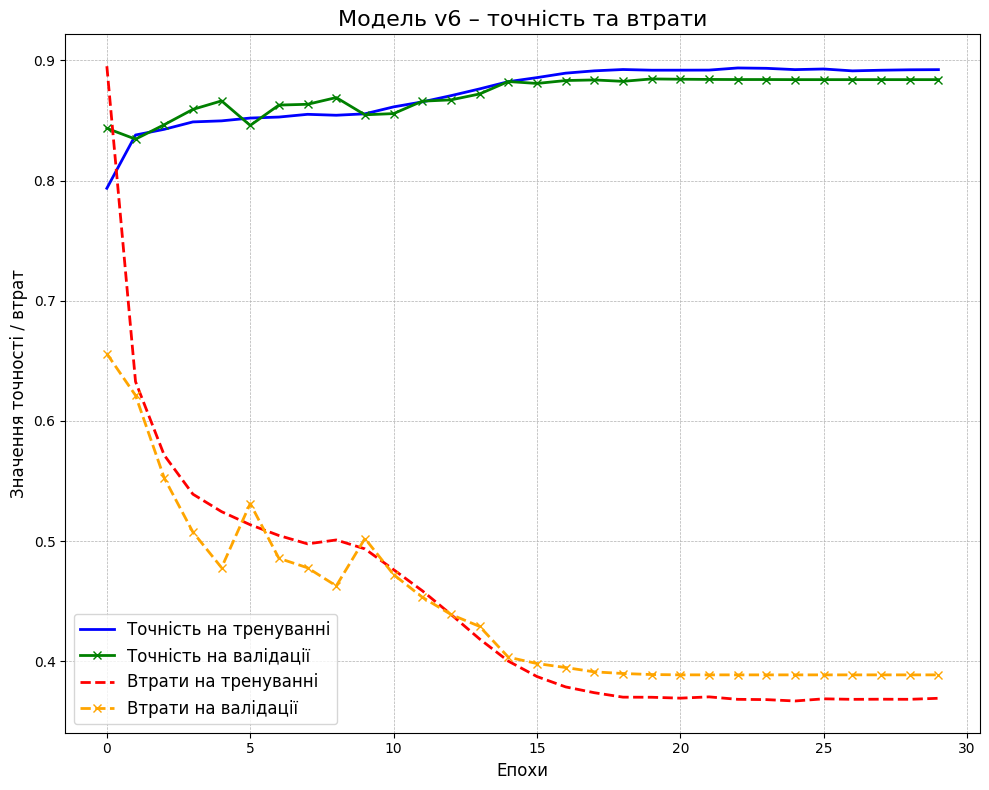

In [28]:
plot_model(history=history_FashionMNIST_v6, model_version='v6')

In [29]:
loss_FashionMNIST_v6, accuracy_FashionMNIST_v6 = FashionMNIST_v6.evaluate(X_test, y_test)
print('  Model    Loss   Accuracy   ')
print(f'    v1   {loss_FashionMNIST_v1:.4f}     {accuracy_FashionMNIST_v1:.4f}')
print(f'    v2   {loss_FashionMNIST_v2:.4f}     {accuracy_FashionMNIST_v2:.4f}')
print(f'    v3   {loss_FashionMNIST_v3:.4f}     {accuracy_FashionMNIST_v3:.4f}')
print(f'    v4   {loss_FashionMNIST_v4:.4f}     {accuracy_FashionMNIST_v4:.4f}')
print(f'    v5   {loss_FashionMNIST_v5:.4f}     {accuracy_FashionMNIST_v5:.4f}')
print(f'    v6   {loss_FashionMNIST_v6:.4f}     {accuracy_FashionMNIST_v6:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8769 - loss: 0.4112
  Model    Loss   Accuracy   
    v1   0.4079     0.8548
    v2   0.3945     0.8585
    v3   0.3451     0.8879
    v4   0.3239     0.8897
    v5   0.3520     0.8916
    v6   0.4112     0.8769


Висновки: регуляризація погіршила показники 

# Cтворюємо сьому модель (з попередньої моделі прибираємо регуляризацію та lr_scheduler)

In [30]:
# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

FashionMNIST_v7 = Sequential(name='v7')
FashionMNIST_v7.add(Input(shape=(784,), name='v7_input'))

FashionMNIST_v7.add(Dense(256, name='v7_hidden1'))
FashionMNIST_v7.add(PReLU(name='v7_prelu1'))
FashionMNIST_v7.add(Dropout(0.3, name='v7_dropout1'))

FashionMNIST_v7.add(Dense(128, name='v7_hidden2'))
FashionMNIST_v7.add(PReLU(name='v7_prelu2'))

FashionMNIST_v7.add(Dense(10, activation='softmax', name='v7_output'))

# Компіляція
FashionMNIST_v7.compile(
    optimizer='Adam',  
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

FashionMNIST_v7.summary()

Model: "v7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ v7_hidden1 (Dense)                   │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v7_prelu1 (PReLU)                    │ (None, 256)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v7_dropout1 (Dropout)                │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v7_hidden2 (Dense)                   │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v7_prelu2 (PReLU)                    │ (None, 128)                 │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v7_output (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,530 (920.04 KB)

 Trainable params: 235,530 (920.04 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history_FashionMNIST_v7 = FashionMNIST_v7.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=50,  # Increased epochs to allow early stopping to work
    validation_split=0.2,
    callbacks=[early_stopping],
)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7981 - loss: 0.5616 - val_accuracy: 0.8422 - val_loss: 0.4218
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8484 - loss: 0.4151 - val_accuracy: 0.8597 - val_loss: 0.3843
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8603 - loss: 0.3806 - val_accuracy: 0.8659 - val_loss: 0.3606
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8692 - loss: 0.3562 - val_accuracy: 0.8789 - val_loss: 0.3377
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8736 - loss: 0.3390 - val_accuracy: 0.8830 - val_loss: 0.3210
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8773 - loss: 0.3276 - val_accuracy: 0.8783 - val_loss: 0.3309
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8833 - loss: 0.3134 - val_accuracy: 0.8798 - val_loss: 0.3256
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8871 - loss: 0.3024 - val_accuracy: 0.

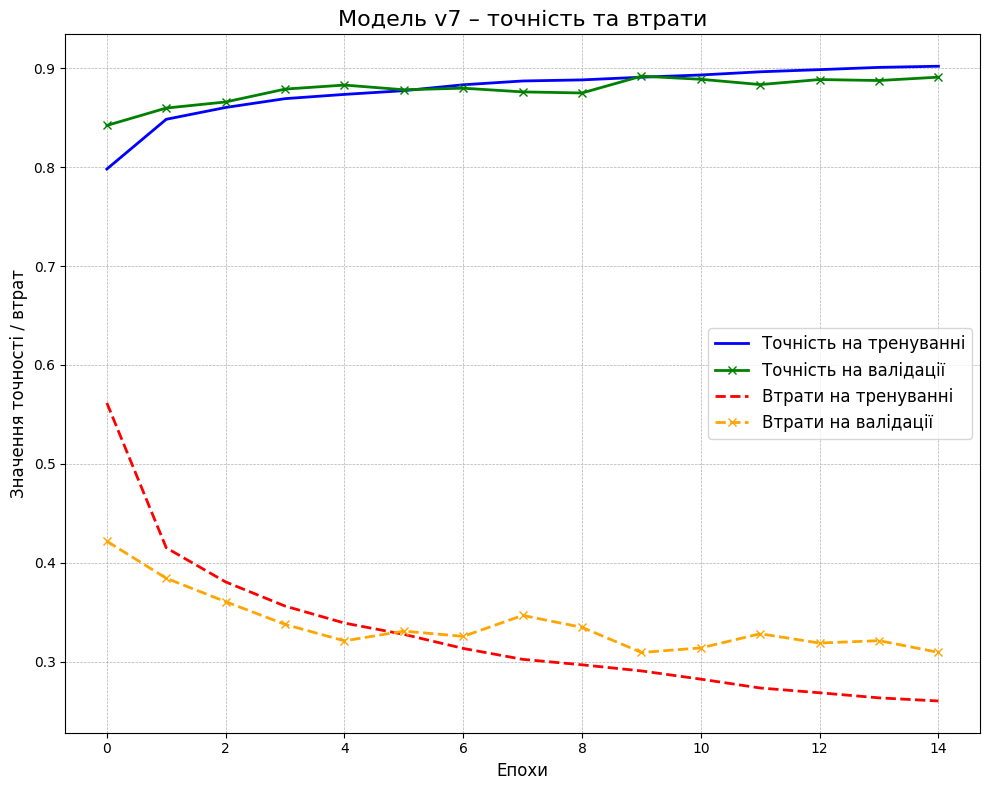

In [32]:
plot_model(history=history_FashionMNIST_v7, model_version='v7')

In [33]:
loss_FashionMNIST_v7, accuracy_FashionMNIST_v7 = FashionMNIST_v7.evaluate(X_test, y_test)
print('  Model    Loss   Accuracy   ')
print(f'    v1   {loss_FashionMNIST_v1:.4f}     {accuracy_FashionMNIST_v1:.4f}')
print(f'    v2   {loss_FashionMNIST_v2:.4f}     {accuracy_FashionMNIST_v2:.4f}')
print(f'    v3   {loss_FashionMNIST_v3:.4f}     {accuracy_FashionMNIST_v3:.4f}')
print(f'    v4   {loss_FashionMNIST_v4:.4f}     {accuracy_FashionMNIST_v4:.4f}')
print(f'    v5   {loss_FashionMNIST_v5:.4f}     {accuracy_FashionMNIST_v5:.4f}')
print(f'    v6   {loss_FashionMNIST_v6:.4f}     {accuracy_FashionMNIST_v6:.4f}')
print(f'    v7   {loss_FashionMNIST_v7:.4f}     {accuracy_FashionMNIST_v7:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8802 - loss: 0.3363
  Model    Loss   Accuracy   
    v1   0.4079     0.8548
    v2   0.3945     0.8585
    v3   0.3451     0.8879
    v4   0.3239     0.8897
    v5   0.3520     0.8916
    v6   0.4112     0.8769
    v7   0.3363     0.8802


Висновки: відбулось покращення

# Cтворюємо восьому модель (зменшуємо batch_size=32 та optimizer=Adam(learning_rate=0.0005)), повертаємо reLU

In [34]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

FashionMNIST_v8 = Sequential(name='v8')
FashionMNIST_v8.add(Input(shape=(784,), name='v8_input'))

# --- Hidden layer 1 з ReLU ---
FashionMNIST_v8.add(Dense(256, activation='relu', name='v8_hidden1'))
FashionMNIST_v8.add(Dropout(0.4, name='v8_dropout1'))

# --- Hidden layer 2 з ReLU ---
FashionMNIST_v8.add(Dense(128, activation='relu', name='v8_hidden2'))

# --- Output layer ---
FashionMNIST_v8.add(Dense(10, activation='softmax', name='v8_output'))

# --- Компіляція ---
FashionMNIST_v8.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

FashionMNIST_v8.summary()

Model: "v8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ v8_hidden1 (Dense)                   │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v8_dropout1 (Dropout)                │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v8_hidden2 (Dense)                   │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ v8_output (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history_FashionMNIST_v8 = FashionMNIST_v8.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50,  # Increased epochs to allow early stopping to work
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7873 - loss: 0.5932 - val_accuracy: 0.8405 - val_loss: 0.4313
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8432 - loss: 0.4324 - val_accuracy: 0.8570 - val_loss: 0.3910
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8549 - loss: 0.3967 - val_accuracy: 0.8673 - val_loss: 0.3643
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8609 - loss: 0.3755 - val_accuracy: 0.8657 - val_loss: 0.3582
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8696 - loss: 0.3566 - val_accuracy: 0.8763 - val_loss: 0.3364
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8749 - loss: 0.3417 - val_accuracy: 0.8727 - val_loss: 0.3430
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8763 - loss: 0.3321 - val_accuracy: 0.8792 - val_loss: 0.3310
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8786 - loss: 0.3233 -

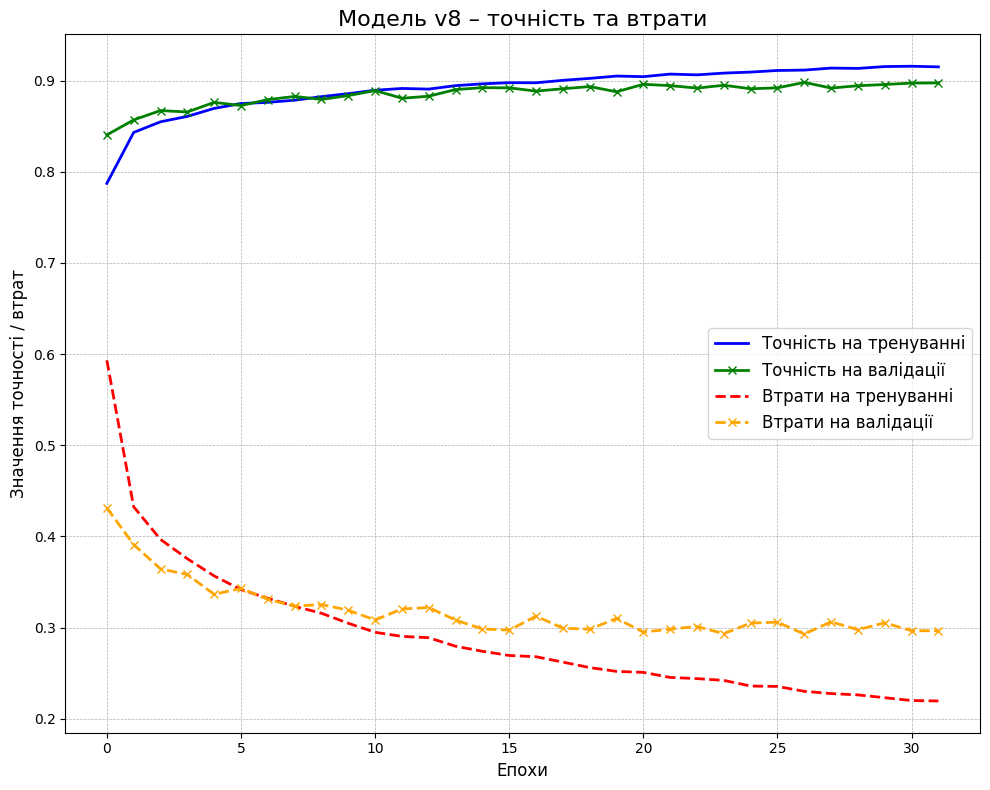

In [36]:
plot_model(history=history_FashionMNIST_v8, model_version='v8')

In [37]:
loss_FashionMNIST_v8, accuracy_FashionMNIST_v8 = FashionMNIST_v8.evaluate(X_test, y_test)
print('  Model    Loss   Accuracy   ')
print(f'    v1   {loss_FashionMNIST_v1:.4f}     {accuracy_FashionMNIST_v1:.4f}')
print(f'    v2   {loss_FashionMNIST_v2:.4f}     {accuracy_FashionMNIST_v2:.4f}')
print(f'    v3   {loss_FashionMNIST_v3:.4f}     {accuracy_FashionMNIST_v3:.4f}')
print(f'    v4   {loss_FashionMNIST_v4:.4f}     {accuracy_FashionMNIST_v4:.4f}')
print(f'    v5   {loss_FashionMNIST_v5:.4f}     {accuracy_FashionMNIST_v5:.4f}')
print(f'    v6   {loss_FashionMNIST_v6:.4f}     {accuracy_FashionMNIST_v6:.4f}')
print(f'    v7   {loss_FashionMNIST_v7:.4f}     {accuracy_FashionMNIST_v7:.4f}')
print(f'    v8   {loss_FashionMNIST_v8:.4f}     {accuracy_FashionMNIST_v8:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8920 - loss: 0.3173
  Model    Loss   Accuracy   
    v1   0.4079     0.8548
    v2   0.3945     0.8585
    v3   0.3451     0.8879
    v4   0.3239     0.8897
    v5   0.3520     0.8916
    v6   0.4112     0.8769
    v7   0.3363     0.8802
    v8   0.3173     0.8920


Висновки: було проведено навчання нейронної мережі зі створенням моделей шляхом підбору різних гіперпараметрів. 
    Деякі методи виявились більш ефективними  (v3- змінюємо активацію на 'softmax' та оптимізатор на 'Adam'), деякі менш (v6 - тут вплинула регуляризація, погіршила).
    Важливо було подивитися картину методів, щоб побачити вплив і як зростатиме точнісь, зменшуватимуться втрати (похибка). 
    